In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

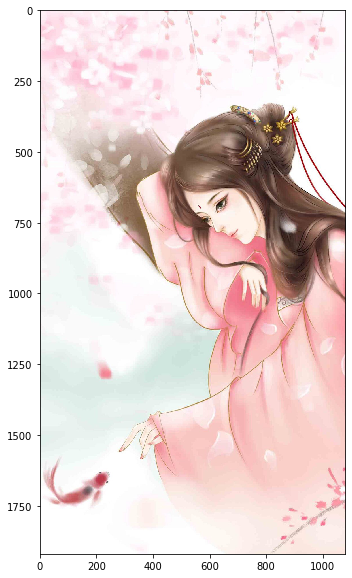

In [6]:
img = cv2.imread('./anime.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img)
plt.show()

对2d图像实施低通滤波（LPF）可以用来去噪，模糊图像，实施高通滤波（HPF）可以帮助我们找到图像边缘

#### cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
+ src 	原图像
+ ddepth 	目标图像的所需深度, 它包含有关图像中存储的数据类型的信息
    ###### You can see in the doc that ddepth stands for "Destination depth", which is the depth of result (destination) image. If you use -1, the result (destination) image will have the same depth as the input (source) image.
    ###### ddepth means desired depth of the destination image
    ###### It has information about what kinds of data stored in an image, and that can be unsigned char (CV_8U), signed char (CV_8S), unsigned short (CV_16U), and so on...
    
    
+ kernel 	卷积核（或相当于相关核），单通道浮点矩阵;如果要将不同的内核应用于不同的通道，请使用拆分将图像拆分为单独的颜色平面，然后单独处理它们。
+ anchor 	内核的锚点，指示内核中过滤点的相对位置;锚应位于内核中;默认值（-1，-1）表示锚位于内核中心。
+ detal 	在将它们存储在dst中之前，将可选值添加到已过滤的像素中。类似于偏置。
+ borderType 	像素外推法，参见BorderTypes

在内核足够大（~11x11或者更大）的时候，该函数使用DFT算法，对于小内核则直接计算。

### 有许多有趣的内核，下面一一介绍：

#### 1.模糊（blur）

kernel = :(模糊核消除了相邻像素值之间的差异)
$$
\left[
\begin{matrix}
0.0625 & 0.125 & 0.0625 \\
0.125 & 0.25 & 0.125 \\
0.0625 & 0.125 & 0.125 
\end{matrix}
\right ]
$$

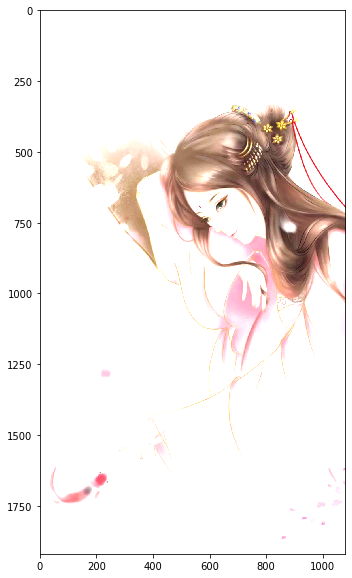

In [8]:
kernel_blur = np.float32([[0.0625, 0.125, 0.0625], [0.125, 0.125, 0.125], [0.625, 0.125, 0.125]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 2.索贝尔（sobel）

kernel = :(用于仅显示特定方向上，相邻像素值的差异，分为left sobel、right sobel（检测梯度的水平变化）、top sobel、buttom sobel（检测梯度的垂直变化）。)
$$
\left[
\begin{matrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 
\end{matrix}
\right ]
$$

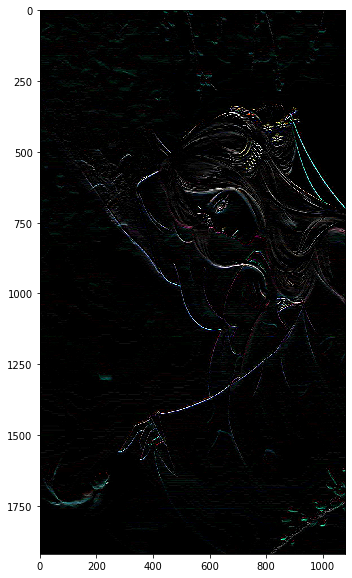

In [9]:
kernel_blur = np.float32([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 浮雕（emboss）

kernel = :(强调像素的差在给定方向和给定深度的错觉)
$$
\left[
\begin{matrix}
-2 & -1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2 
\end{matrix}
\right ]
$$

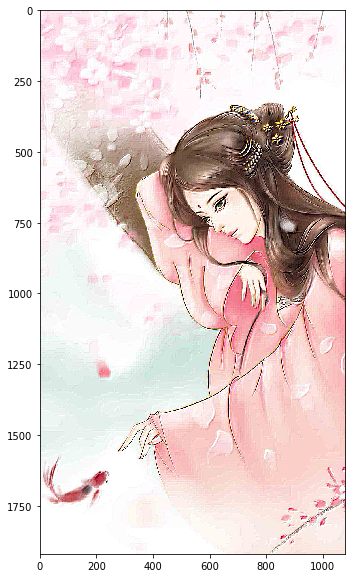

In [10]:
kernel_blur = np.float32([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 大纲（outline）

kernel = :(轮廓内核（也称为“边缘”内核）用于突出显示像素值大的差异。与相邻像素差异较小的像素在新图像中将显示为黑色，而与相邻像素值差异非常大的像素在新图中将显示为白色。)
$$
\left[
\begin{matrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 
\end{matrix}
\right ]
$$

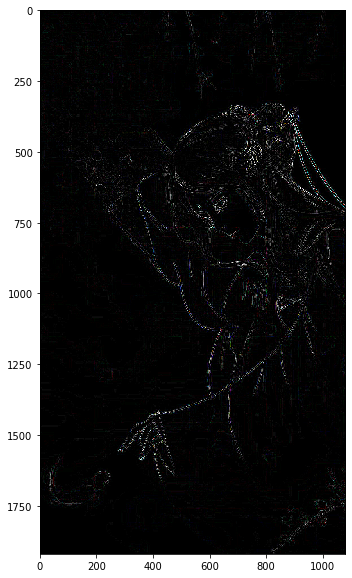

In [12]:
kernel_blur = np.float32([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 锐化（sharpen）

kernel = :(强调相邻像素值的差异)
$$
\left[
\begin{matrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 
\end{matrix}
\right ]
$$

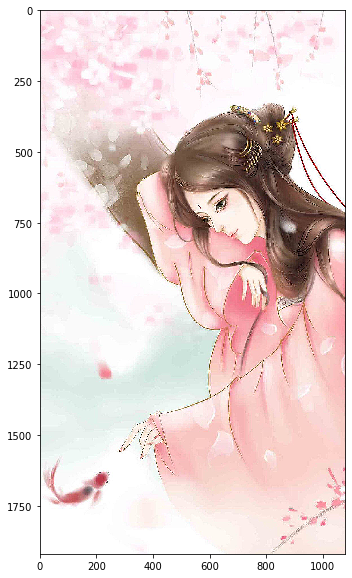

In [13]:
kernel_blur = np.float32([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 拉普拉斯算子（laplacian operator）

kernel = :(可以用于边缘检测，对于检测模糊也非常有用)
$$
\left[
\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 
\end{matrix}
\right ]
$$

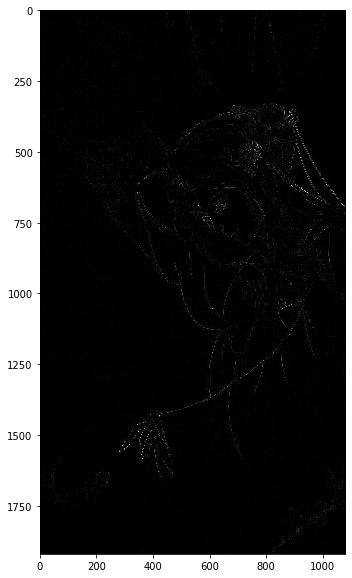

In [14]:
kernel_blur = np.float32([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()

#### 分身（identity）

kernel = :(就是原图)
$$
\left[
\begin{matrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 
\end{matrix}
\right ]
$$

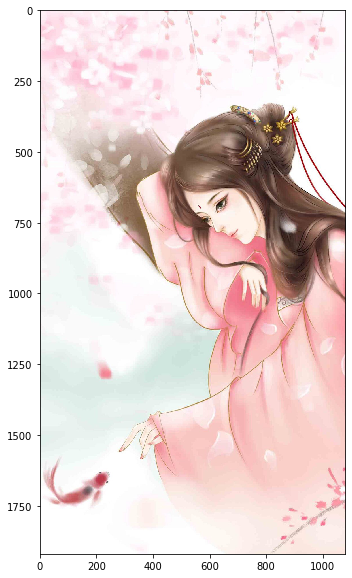

In [15]:
kernel_blur = np.float32([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
img_blur = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_blur)

fig, ax = plt.subplots(figsize=[8, 10])
ax.imshow(img_blur)
plt.show()